🔷 What is Scikit-learn?
Scikit-learn is a powerful Python library used to build, train, and evaluate machine learning models.

It provides:

Pre-built machine learning algorithms (like linear regression, decision trees, etc.)

Tools for preprocessing data

Tools for model evaluation

Utilities like train-test split, cross-validation,

In [ ]:
import pandas as pd
data = {
    'x':[20, 30, 40, 50, 60,70,80,90,100, 60],
    'y':[2, 3,4,5,6,7,8,9,10,11]
}

df = pd.DataFrame(data)

X = df['x']
y = df['y']

In [ ]:
!pip install scikit-learn

In [ ]:
from sklearn.model_selection import train_test_split

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=1)

In [ ]:
X_train

In [ ]:
X_test

In [ ]:
import seaborn as sns 

df = sns.load_dataset('titanic')

In [ ]:
sns.load_dataset('anagrams')

In [ ]:
df.isna() #-> if null -> True is not null -> False

In [ ]:
df.isna().sum()

In [ ]:
df.info()

In [ ]:
# Impute numerical column -> check whether outlier is present or not  (Median) , if not mean
df['age'].plot(kind='box')

In [ ]:
df['age'].fillna(df['age'].median(), inplace=True)

In [ ]:
df['age'].isna().sum()

### Undersampling 
Undersampling is the technique to handle the imbalanced datasets by reducing the number of samples in the minority class.

In [52]:
from sklearn.datasets import make_classification

X, y = make_classification(n_samples=1000, n_features=4, n_redundant=1, n_classes=2, weights=[0.9, 0.1], random_state=42)

In [58]:
import pandas as pd
df = pd.DataFrame(X, columns=[ 'Feature1', 'Feature2' ,'Feature3', 'Feature4'
])

df['Target'] = y

df.head()
# -> 1000 rows and 5 columns 

,Feature1,Feature2,Feature3,Feature4,Target
0,-1.026210,0.310125,-0.848429,0.566398,0
1,-1.273972,0.719066,0.408653,-1.016596,0
2,-1.527855,0.452208,-2.219300,0.892261,0
3,-1.806933,0.550325,-0.351414,0.975364,0
4,-1.047730,0.625984,1.537932,-1.014258,0


In [ ]:
df['Target'].value_counts()

# class 0 -> 900  -> 0.9  ] class 1 -> 100 -> 0.1]

Target
0    896
1    104
Name: count, dtype: int64

<Axes: >

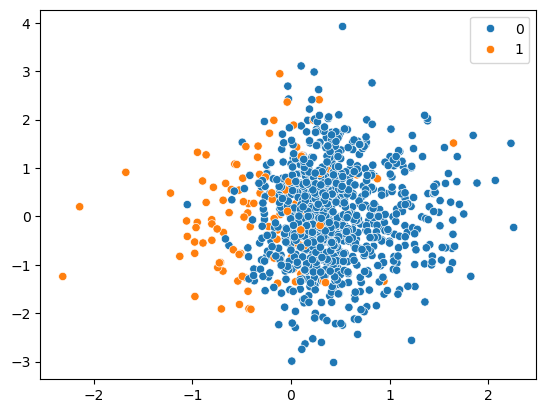

In [ ]:
import matplotlib.pyplot as plt
import seaborn as sns


sns.scatterplot(x=X[:, 1], y=X[:, 2], data=df, hue=y)

In [61]:
# imblearn 
from imblearn.under_sampling import RandomUnderSampler

underSampler = RandomUnderSampler()

# class 0 -> 900 -> 100 fit  and then resample
Resampled_X, Resampled_y = underSampler.fit_resample(X, y)

In [64]:
resampled_data =pd.DataFrame(Resampled_X, columns=[ 'Feature1', 'Feature2' ,'Feature3', 'Feature4'
])
resampled_data['Target'] = Resampled_y

## Here the majority class is downsampled 

In [67]:
resampled_data['Target'].value_counts()

Target
0    104
1    104
Name: count, dtype: int64

<Axes: xlabel='Feature1', ylabel='Feature2'>

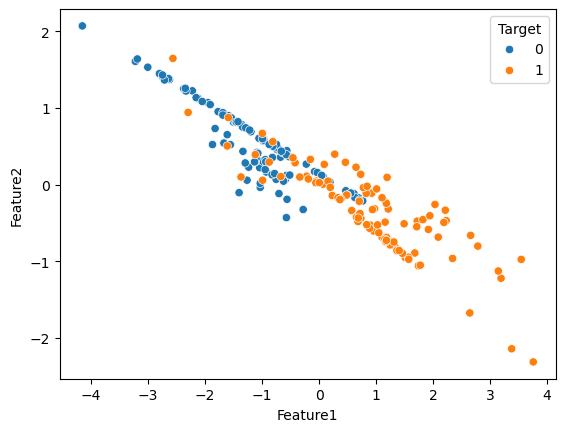

In [68]:
sns.scatterplot(x=resampled_data['Feature1'], y=resampled_data['Feature2'], data= resampled_data, hue=resampled_data['Target'])

### Overasampling 


In [71]:
from imblearn.over_sampling import RandomOverSampler

overaSampler = RandomOverSampler()

X_oversampled, y_oversampled = overaSampler.fit_resample(X, y)

In [73]:
overSampled_data =pd.DataFrame(X_oversampled, columns=[ 'Feature1', 'Feature2' ,'Feature3', 'Feature4'
])
overSampled_data['Target'] = y_oversampled

<Axes: xlabel='Feature1', ylabel='Feature2'>

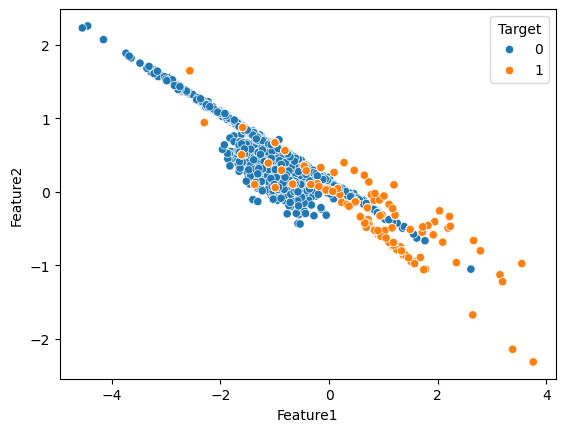

In [74]:
sns.scatterplot(x=overSampled_data['Feature1'], y=overSampled_data['Feature2'], data= overSampled_data, hue=overSampled_data['Target'])

In [ ]:
overSampled_data['Target'].value_counts()

# minorirty -> 900 here the minority class is oversampled

Target
0    896
1    896
Name: count, dtype: int64

In [77]:
from imblearn.over_sampling import SMOTE

smote = SMOTE()
X_smote, y_smote=smote.fit_resample(X, y)

In [78]:
smote_data =pd.DataFrame(X_smote, columns=[ 'Feature1', 'Feature2' ,'Feature3', 'Feature4'
])
smote_data['Target'] = y_smote

<Axes: xlabel='Feature1', ylabel='Feature2'>

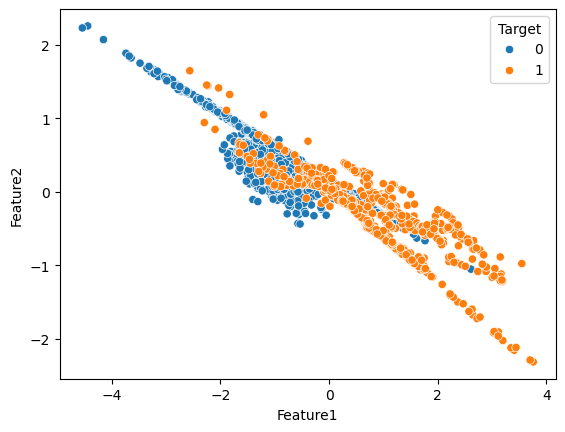

In [80]:
sns.scatterplot(x= smote_data['Feature1'], y= smote_data['Feature2'], data = smote_data, hue= smote_data['Target'])

In [82]:
smote_data['Target'].value_counts()

Target
0    896
1    896
Name: count, dtype: int64

In [91]:
data = [-200, 20, 30, 40, 50, 17,28, 27, 56, 300]

In [92]:
df = pd.DataFrame({'Value': data})

<Axes: xlabel='Value'>

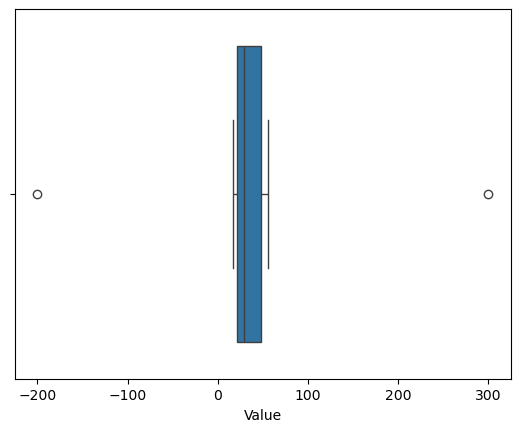

In [93]:
sns.boxplot(x=df['Value'], data=df)

<Axes: xlabel='Value'>

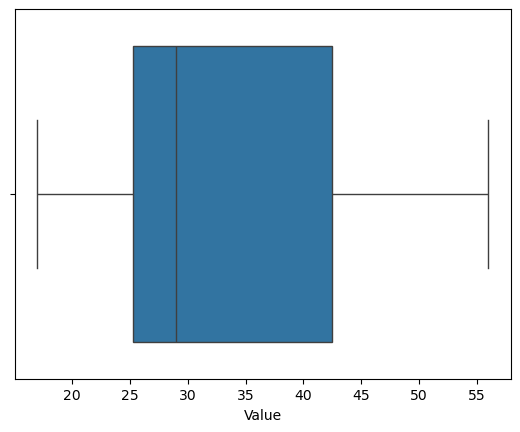

In [ ]:
Q1 = df['Value'].quantile(0.25) # here we are basically calculating the 25% tile -> Q1

Q3 = df['Value'].quantile(0.75)#  here we are basically calculating the 75% tile -> Q3

IQR = Q3 - Q1 
lower_fence = Q1 - 1.5 * IQR
upper_fence = Q3 + 1.5 * IQR
# Homework filter out the outliers from the given dataset 
# find out the outliers 
# filter out df -> remove the outliers from the dataset.

# here we  are filtering out the outliers 
filter_data = df[(df['Value'] > lower_fence) & (df['Value'] < upper_fence)]
sns.boxplot(x=filter_data['Value'], data=filter_data)

In [100]:
filter_data

,Value
1,20
2,30
3,40
4,50
5,17
6,28
7,27
8,56


In [104]:
# Impute the data with the mean median
import numpy as np

# Calculate the 5st and 95th percentile
# 
lower = df['Value'].quantile(0.10)
print(lower)
upper = df['Value'].quantile(0.90)
print(upper)
# Cap the values
df['Value_capped'] = np.clip(df['Value'], lower, upper)

df['Value_capped']


-4.699999999999996
80.39999999999992


0    -4.7
1    20.0
2    30.0
3    40.0
4    50.0
5    17.0
6    28.0
7    27.0
8    56.0
9    80.4
Name: Value_capped, dtype: float64

In [ ]:
df['Value_capped'].plot(kind='box')

In [ ]:
# Impute the outliers with the mean value
mean_value = df['Value'].mean()
df['Value_imputed_mean'] = df['Value'].where(
    (df['Value'] >= lower_fence) & (df['Value'] <= upper_fence),
    mean_value
) 
df

## Feature Scaling and Feature Engineering

In [ ]:
# Feature Engineering and feature scaling 

import pandas as pd 


data = pd.DataFrame({
    "Distance" : [10, 20, 30, 40, 50, 80],
    "Time": [1,2,2,3.1,3,1]
})



In [ ]:
# Feature scaling : 
# Standardization
from sklearn.preprocessing import StandardScaler

Scaler = StandardScaler()
scaled_df = Scaler.fit_transform(data)

## Encoding 

Labelencoder, 
OneHotEncoder,
OrdinalEncoder

In [41]:
data = pd.DataFrame({
    'Grade' : ['Grade A', 'Grade B', 'Grade C','Grade A', 'Grade B', 'Grade C' ],
    'Animal': ['cat', 'dog', 'cow','cat', 'dog', 'cow']
})

In [45]:
from sklearn.preprocessing import LabelEncoder

label = LabelEncoder()
transformed_data = label.fit_transform(data['Grade'])
print(transformed_data)

from sklearn.preprocessing import OrdinalEncoder 
ordinal = OrdinalEncoder(categories=[['Grade A', 'Grade B', 'Grade C']])
ordinal.fit_transform(data[['Grade']])

[0 1 2 0 1 2]


array([[0.],
       [1.],
       [2.],
       [0.],
       [1.],
       [2.]])